<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Guided Practice: Explore Python Data Visualization

_Authors: Alexander Combs (New York City), Dave Yerrington (San Francisco), and Kevin Markham (Washington, D.C.). Adapted by Vlada Rozova (Sydney)_

---

In this guided practice lab you will use Pandas, Matplotlib, and Seaborn to create simple plots.

We'll cover plotting line plots, scatter plots, bar plots, and histograms, and how to manipulate the style of your plots with Matplotlib.

## Learning Objectives

- **Practice** using different types of plots.
- **Use** Pandas methods for plotting.
- **Create** line plots, bar plots, histograms, and box plots.
- **Know** when to use Seaborn or advanced Matplotlib

## Lesson Guide

- [Line Plots](#line-plots)
- [Bar Plots](#bar-plots)
- [Histograms](#histograms)
    - [Grouped Histograms](#grouped-histograms)
    
    
- [Box Plots](#box-plots)
    - [Grouped Box Plots](#grouped-box-plots)
    
- [Scatter Plots](#scatter-plots)
- [Using Seaborn](#using-seaborn)
- [OPTIONAL: Understanding Matplotlib (Figures, Subplots, and Axes)](#matplotlib)
- [OPTIONAL: Additional Topics](#additional-topics)

- [Summary](#summary)

## Introduction

In this lab, we will introduce how plotting works in Pandas and Matplotlib. It is important to know that Pandas uses Matplotlib behind the scenes to make plots. So, you will notice that Pandas plotting methods often use similar parameter names as Matplotlib methods. Further, you can use Matplotlib functions in combination with Pandas methods to alter the plots after drawing them. For example, you can use Matplotlib's `xlabel` and `title` functions to label the plot's x-axis and title, respectively, after it is drawn.

As we explore different types of plots, notice:

1. Different types of plots are drawn very similarly -- they even tend to share parameter names.
2. In Pandas, calling `plot()` on a `DataFrame` is different than calling it on a `Series`. Although the methods are both named `plot`, they may take different parameters.

Toward the end of the lab, we will show some motivational plots using Seaborn, a popular statistics plotting library, as well as go more in-depth about how Matplotlib works.

### Choose the right type of visualization

The choice of visualization should depend what you are trying to show. Here is a helpful flowchart that you can use to determine the best type of visualizations.

![Chart Suggestions](../assets/images/chart_suggestions.jpg)

[Image via Pinterest](https://www.pinterest.com.au/viviamrib/)

### Pandas Plotting Documentation

[Link to Documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

In [19]:
from IPython.display import HTML

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

### Create fake data for examples

In [20]:
df = pd.DataFrame(np.random.randn(10, 4), 
                  columns=['col1', 'col2', 'col3', 'col4'],
                  index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])
df

,col1,col2,col3,col4
a,-1.133298,1.823184,-0.429129,-1.231504
b,-0.152350,1.137630,-0.658283,-0.712057
c,-1.532128,2.483031,0.806710,1.247158
d,0.128086,-0.139036,0.774225,1.268848
e,-0.693187,0.151013,0.603479,-0.129530
f,0.220013,-1.064330,0.809607,-2.500783
g,-0.648031,1.094998,-0.216314,-0.053092
h,-0.601787,-0.222117,0.403471,1.144663
i,-0.871364,-0.697390,0.682057,-0.190427
j,-0.340597,1.198686,-0.048487,1.332927


### Call `plot()` on a `DataFrame`

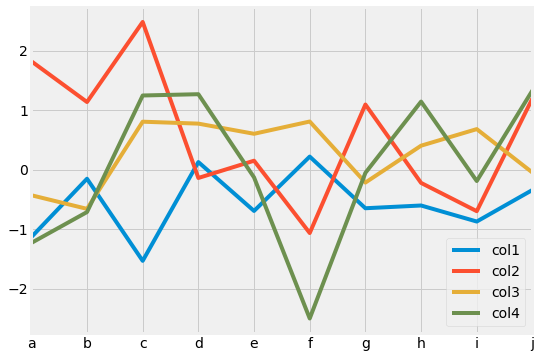

In [21]:
df.plot();

### How to change the size of a plot

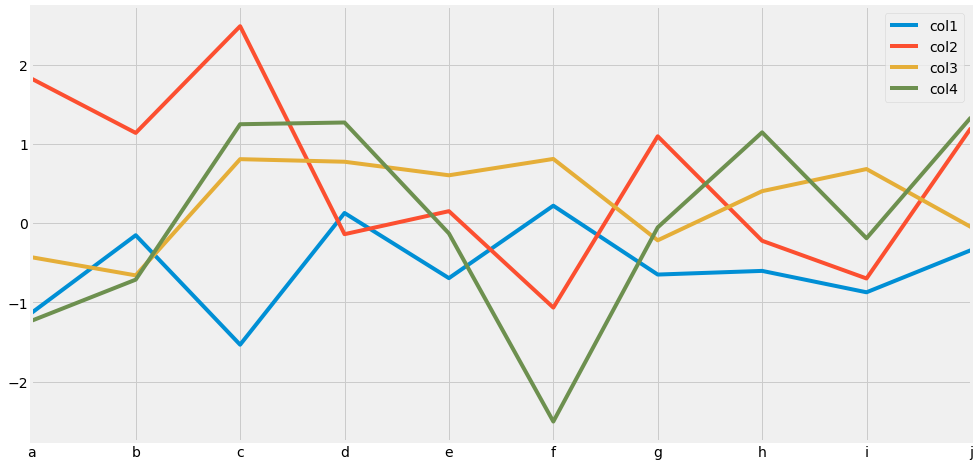

In [22]:
# Technically the figsize is 15 "inches" (width) by 8 "inches" (height)
#   The figure is specified in inches for printing -- you set a dpi (dots/pixels per inch) elsewhere
df.plot(figsize=(15,8)); # width, height

### How to change the colour of a plot

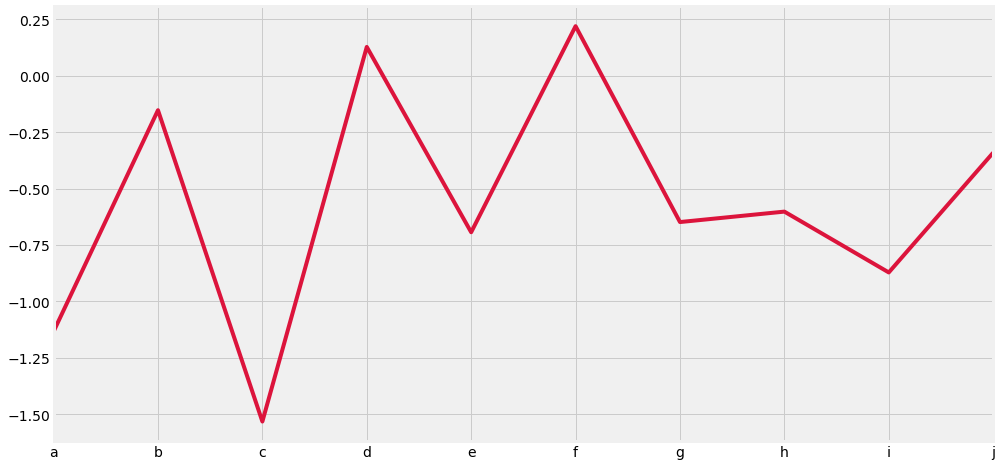

In [23]:
df['col1'].plot(color='crimson', figsize=(15,8));

You can find more named colours [here](https://matplotlib.org/gallery/color/named_colors.html). Choose the ones you like!

### How to change the style of individual lines

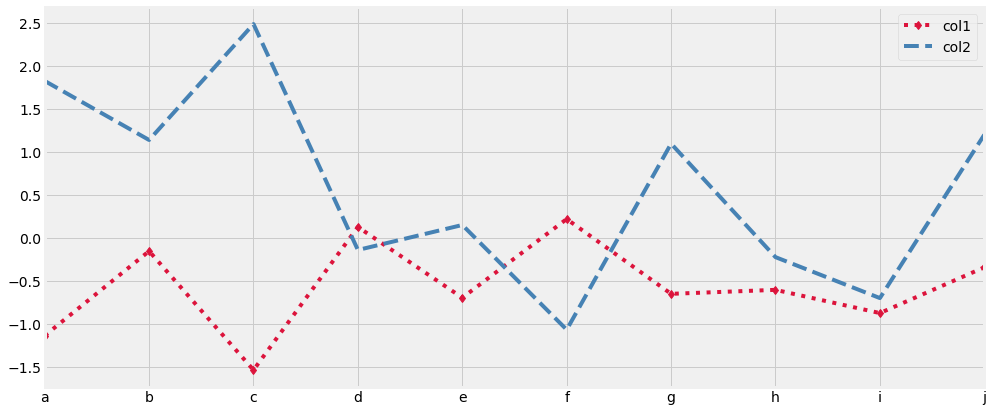

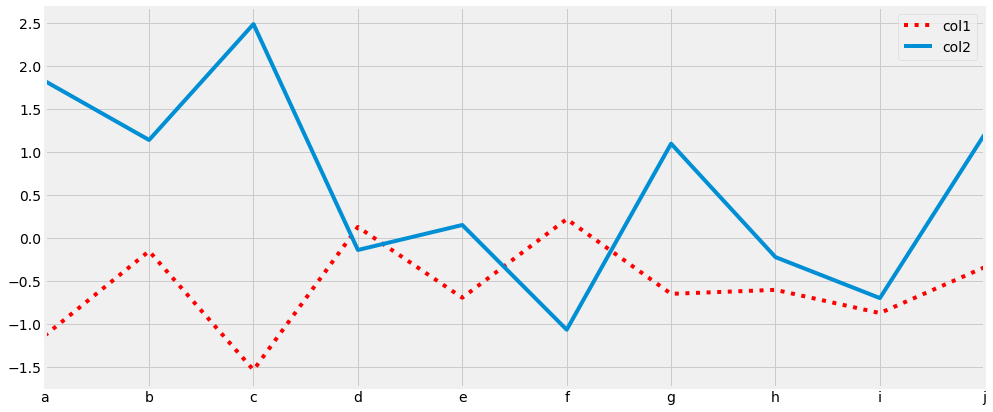

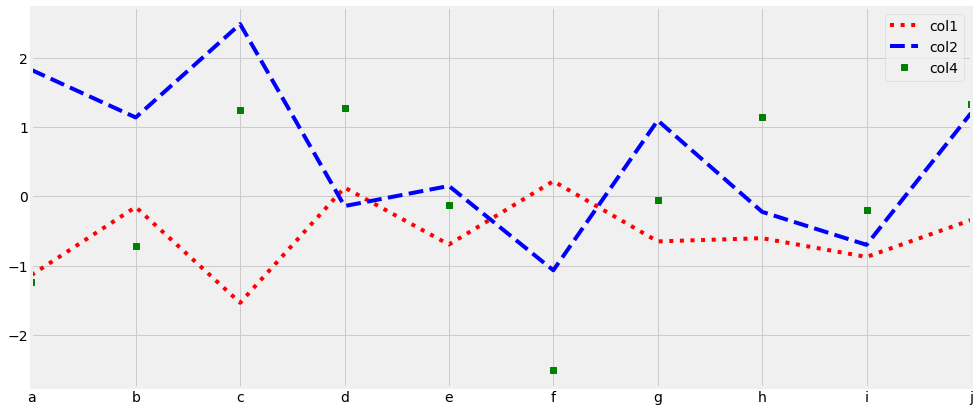

In [24]:
# ':' - dotted line, '--' - dashed line
# 'r' - red, 'b' - blue, 'g' - green
df[['col1', 'col2']].plot(figsize=(15,7), style=[':d', '--'], color = ['crimson', 'steelblue']);

# Alternatively, you can specify colours together with the style 
df[['col1', 'col2']].plot(figsize=(15,7), style={'col1': ':r', 'col4': '--b'});

# You can also add markers
df[['col1', 'col2', 'col4']].plot(figsize=(15,7), style={'col1': ':r', 'col2': '--b', 'col4': 'sg'});

The image below shows all marker names and descriptions.

![Markers](../assets/images/markers.png)

[Image via Stackoverflow](https://stackoverflow.com/questions/8409095/matplotlib-set-markers-for-individual-points-on-a-line)

## Load in data sets for visualization examples.

The Boston data dictionary can be found [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).

In [25]:
# Read in the Boston housing data.
housing_csv = '../data/boston_housing_data.csv'
housing = pd.read_csv(housing_csv)

# Read in the drinks data.
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
url = '../data/drinks.csv'
drinks = pd.read_csv(url, header=0, names=drink_cols, na_filter=False)

# Read in the ufo data.
ufo = pd.read_csv('../data/ufo.csv')
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo['Year'] = ufo.Time.dt.year

In [26]:
ufo

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933
5,Valley City,NaN,DISK,ND,1934-09-15 15:30:00,1934
6,Crater Lake,NaN,CIRCLE,CA,1935-06-15 00:00:00,1935
7,Alma,NaN,DISK,MI,1936-07-15 00:00:00,1936
8,Eklutna,NaN,CIGAR,AK,1936-10-15 17:00:00,1936
9,Hubbard,NaN,CYLINDER,OR,1937-06-15 00:00:00,1937


<a id="line-plots"></a>
## Line plots: Show the trend of a numerical variable over time
---

- **Objective:** **Use** Pandas methods for plotting.
- **Objective:** **Create** line plots, bar plots, histograms, and box plots.

### Line Plot With a `DataFrame`

In [27]:
# Count the number of ufo reports each year (and sort by year).
ufo.Year.value_counts().sort_index()

1930       2
1931       2
1933       1
1934       1
1935       1
1936       2
1937       2
1939       3
1941       2
1942       3
1943       5
1944       8
1945       9
1946       8
1947      41
1948       9
1949      19
1950      31
1951      21
1952      52
1953      36
1954      55
1955      33
1956      46
1957      78
1958      53
1959      57
1960      67
1961      50
1962      72
        ... 
1985     211
1986     186
1987     210
1988     232
1989     247
1990     237
1991     220
1992     245
1993     292
1994     406
1995    1344
1996     851
1997    1237
1998    1743
1999    2774
2000    2635
2001    2925
2002    2933
2003    3507
2004    3850
2005    3787
2006    3445
2007    4058
2008    4655
2009    4251
2010    4154
2011    5089
2012    7263
2013    7003
2014    5382
Name: Year, Length: 82, dtype: int64

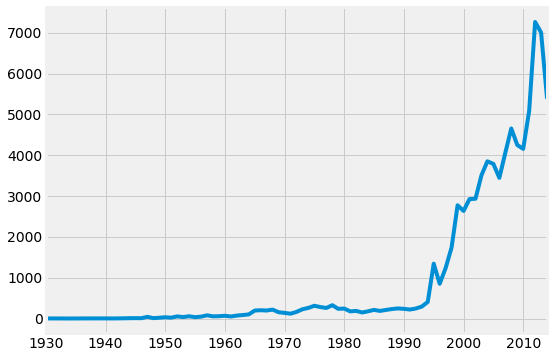

In [28]:
# Compare with line plot -- UFO sightings by year. (Ordering by year makes sense.)
ufo.Year.value_counts().sort_index().plot();

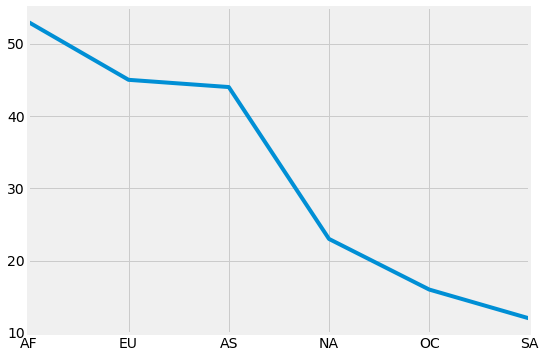

In [29]:
# Compare alcohol consumption on different continents
drinks.continent.value_counts().plot();

> **# COMMON MISTAKE: Don't use a line plot when the x-axis cannot be ordered sensically!** 

> For example, ordering by continent below shows a trend where it doesn't exist, it would be just as valid to plot the continents in any order. A line plot is the wrong type of plot for this data. A set of continents can be rearranged misleadingly to illustrate a negative trend, as we did here. Due to this, it would be more appropriate to represent this data using a bar plot, which does not imply a trend based on order.

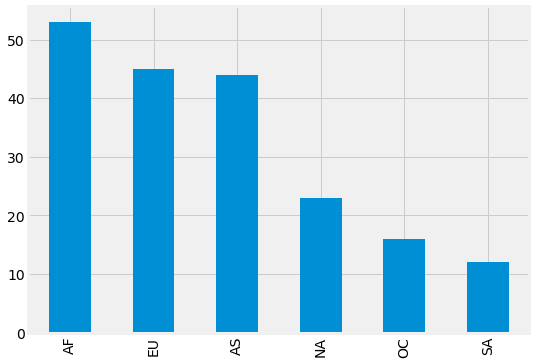

In [30]:
# Plot the same data as a (horizontal) bar plot -- a much better choice!
drinks.continent.value_counts().plot(kind='bar');

### Challenge: Create a line plot of `ZN` and `INDUS` in the housing data. 

- For `ZN`, use a dotted green line with a marker of your choice. For `INDUS`, use a solid blue line.
- Change the figure size to a width of 12 and height of 8.

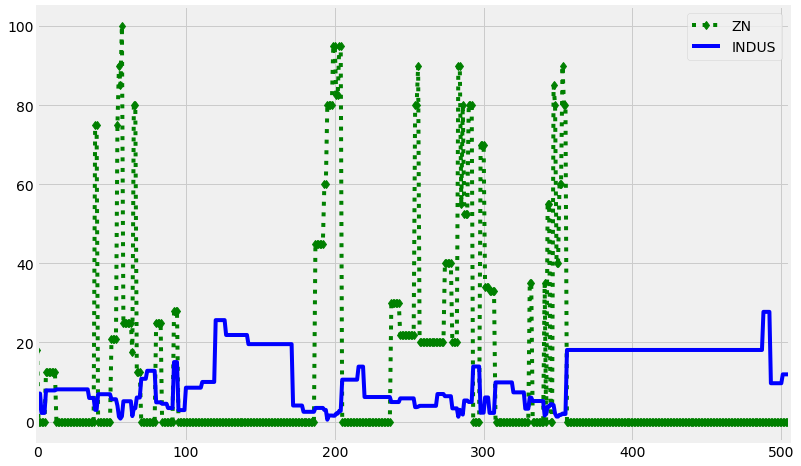

In [31]:
housing[["ZN", "INDUS"]].plot(figsize=(12, 8), style={"ZN" : ":dg", "INDUS" : "b"});

<a id="bar-plots"></a>
## Bar Plots: Show a numerical comparison across different categories
---

In [32]:
drinks.head()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [33]:
# Count the number of countries in each continent.
drinks.continent.value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

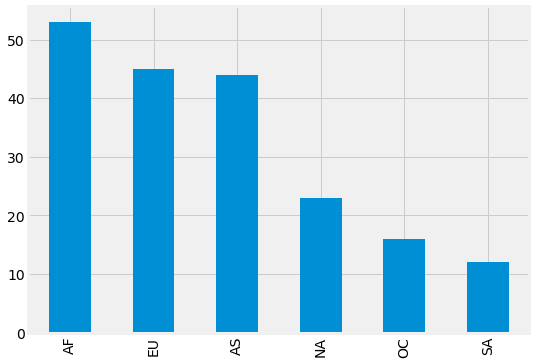

In [34]:
# Compare with bar plot.
drinks.continent.value_counts().plot(kind='bar');

In [35]:
# Calculate the mean alcohol amounts for each continent.
drinks.groupby('continent').mean()

,beer,spirit,wine,liters
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


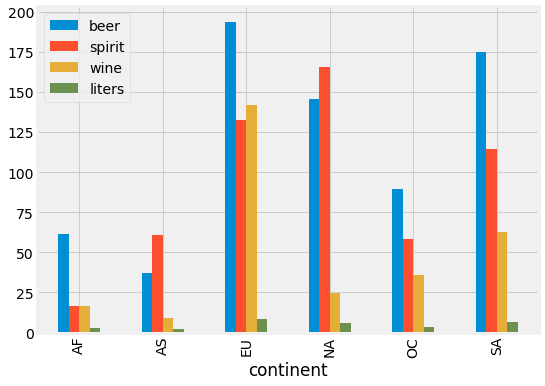

In [36]:
# Side-by-side bar plots
drinks.groupby('continent').mean().plot(kind='bar');

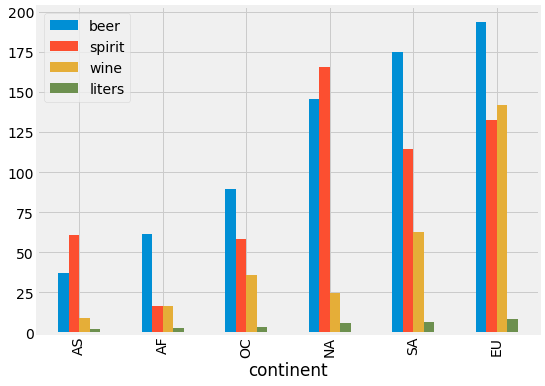

In [37]:
# Sort the continent x-axis by a particular column.
drinks.groupby('continent').mean().sort_values('beer').plot(kind='bar');

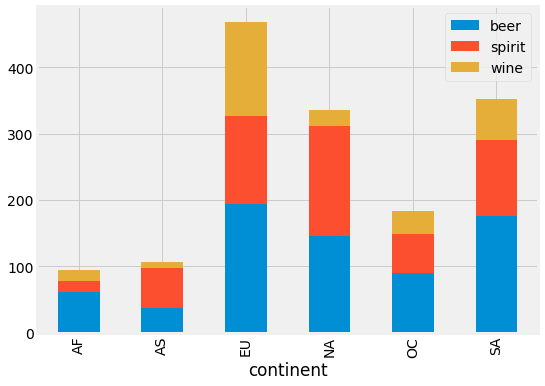

In [38]:
# Stacked bar plot (with the liters comparison removed!)
drinks.groupby('continent').mean().drop('liters', axis=1).plot(kind='bar', stacked=True);

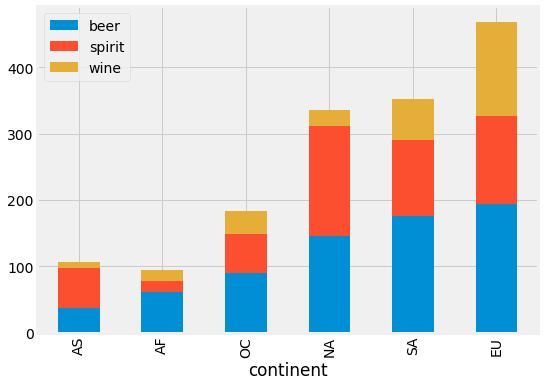

In [39]:
# Stacked bar plot sorted by beer amounts
drinks.groupby('continent').mean().drop('liters', axis=1).sort_values('beer').plot(kind='bar', stacked=True);

### Using a `DataFrame` and Matplotlib commands, we can get fancy.

In [40]:
df

,col1,col2,col3,col4
a,-1.133298,1.823184,-0.429129,-1.231504
b,-0.152350,1.137630,-0.658283,-0.712057
c,-1.532128,2.483031,0.806710,1.247158
d,0.128086,-0.139036,0.774225,1.268848
e,-0.693187,0.151013,0.603479,-0.129530
f,0.220013,-1.064330,0.809607,-2.500783
g,-0.648031,1.094998,-0.216314,-0.053092
h,-0.601787,-0.222117,0.403471,1.144663
i,-0.871364,-0.697390,0.682057,-0.190427
j,-0.340597,1.198686,-0.048487,1.332927


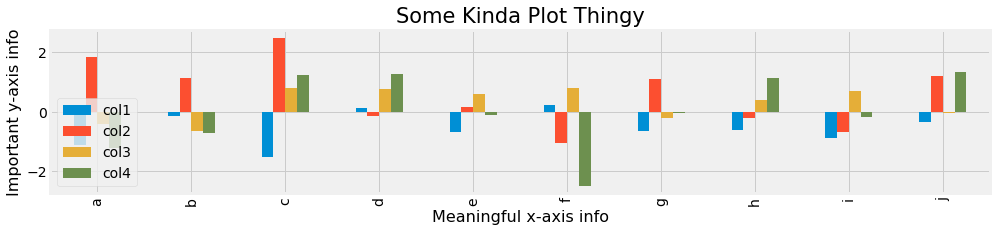

In [41]:
ax = df.plot(kind='bar', figsize=(15,3));

# Set the title.
ax.set_title('Some Kinda Plot Thingy', fontsize=21, y=1.01);

# Move the legend.
ax.legend(loc=3);

# y-axis labels
ax.set_ylabel('Important y-axis info', fontsize=16);

# x-axis labels
ax.set_xlabel('Meaningful x-axis info', fontsize=16);

Other options for legend location can be found [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html)!

### Challenge: Create a bar chart using `col1` and `col2`.

- Give the plot a large title of your choosing. 
- Move the legend to the lower-left corner.

Text(0.5, 1.0, 'a bar chart')

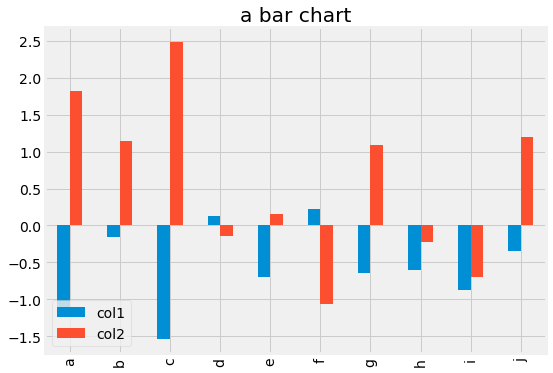

In [42]:
bar =df[['col1','col2']].plot(kind = 'bar')
bar.legend(loc=3)
bar.set_title('a bar chart')

- Do the same thing but with horizontal bars.
- Move the legend to the upper-right corner.

Text(0.5, 1.0, 'a horizontal bar chart')

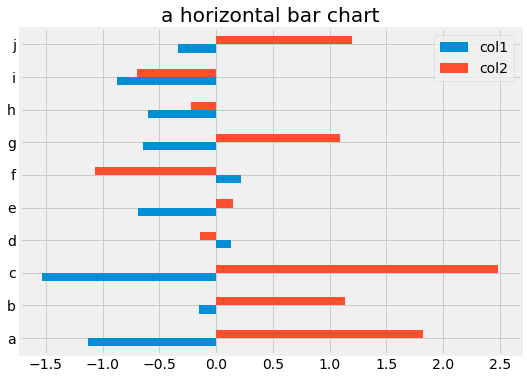

In [43]:
barh =df[['col1','col2']].plot(kind = 'barh')
barh.legend(loc=1)
barh.set_title('a horizontal bar chart')

### Stacked works on horizontal bar charts.

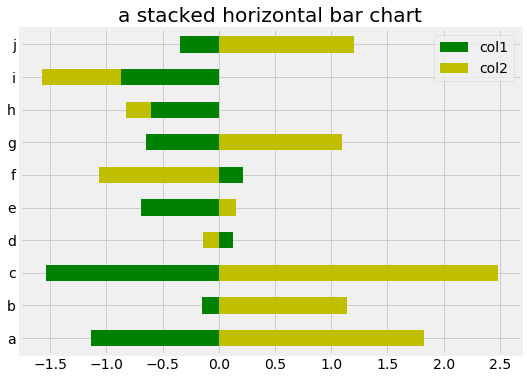

In [44]:
barh =df[['col1','col2']].plot(kind = 'barh' , stacked = True, color = ['g', 'y'])
barh.legend(loc=1)
# chage size?
barh.set_title('a stacked horizontal bar chart');

<a id="histograms"></a>
## Histograms: Show the distribution of a numerical variable
---


In [46]:
# Sort the beer column and mentally split it into three groups.
drinks.beer.sort_values().values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   1,   1,   1,   2,   3,   5,   5,   5,   5,   5,
         6,   6,   6,   6,   8,   8,   8,   9,   9,   9,   9,  12,  13,
        15,  15,  16,  16,  17,  18,  19,  19,  20,  20,  21,  21,  21,
        21,  22,  23,  25,  25,  25,  25,  26,  28,  31,  31,  31,  31,
        32,  32,  34,  36,  36,  36,  37,  42,  42,  43,  44,  45,  47,
        49,  51,  51,  52,  52,  52,  53,  56,  56,  57,  58,  60,  62,
        62,  63,  64,  69,  71,  76,  76,  77,  77,  77,  78,  79,  82,
        82,  85,  88,  89,  90,  92,  93,  93,  98,  99, 102, 105, 106,
       109, 111, 115, 120, 122, 124, 127, 128, 130, 133, 140, 142, 143,
       144, 147, 149, 149, 152, 157, 159, 162, 163, 167, 169, 171, 173,
       185, 188, 192, 193, 193, 194, 194, 196, 197, 199, 203, 206, 213,
       217, 219, 224, 224, 225, 230, 231, 233, 234, 236, 238, 240, 245,
       245, 247, 249, 251, 261, 263, 263, 270, 279, 281, 283, 28

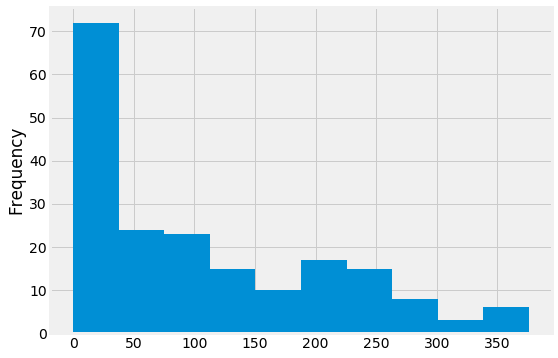

In [47]:
# Compare the above with histogram.
# About how many of the points above are in the groups 1-125, 125-250, and 250-376?
drinks.beer.plot(kind='hist', bins=10);

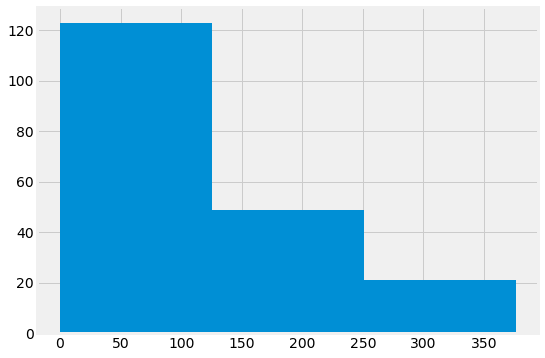

In [48]:
# Alternatively, you can use .hist() method:
drinks.beer.hist(bins=3);

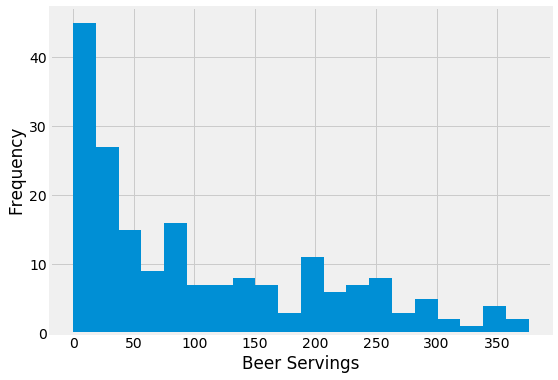

In [54]:
# Try more bins — it takes the range of the data and divides it into 20 evenly spaced bins.
drinks.beer.plot(kind='hist', bins=20);
plt.xlabel('Beer Servings');
plt.ylabel('Frequency');

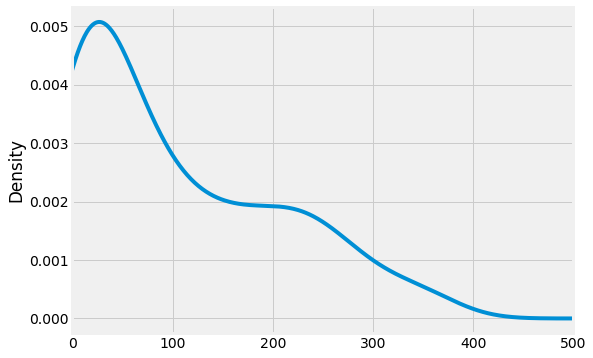

In [55]:
# Compare with density plot (smooth version of a histogram). Sample distribution is approximated with a line.
drinks.beer.plot(kind='density', xlim=(0, 500));

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

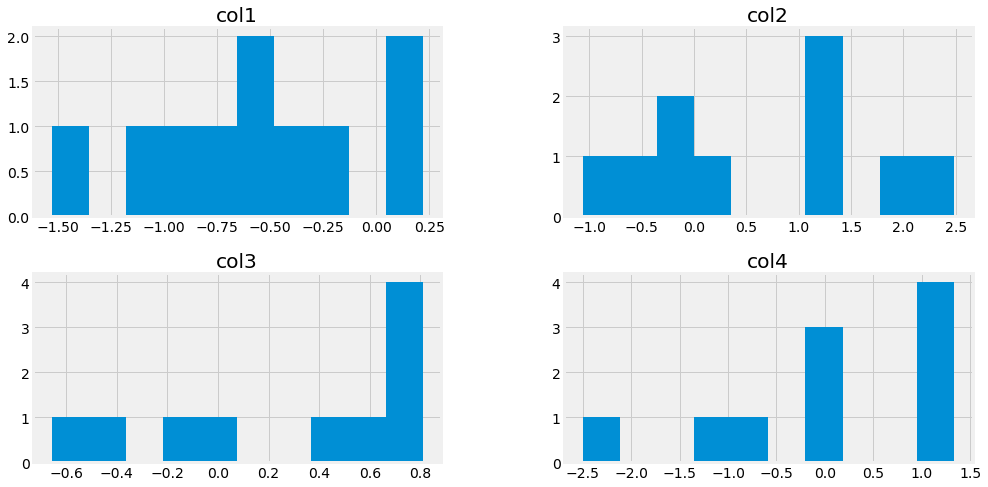

In [64]:
# Note the difference between calling .hist() on a Series and on a DataFrame
newnew = df.hist(figsize=(15,8));
newnew['col1'].xlabel('Beer Servings');

### Single Histogram

In [59]:
# Generate 5000 numbers from a standard normal distribution. What are the mean and sd?
norm = np.random.standard_normal(5000)

In [60]:
# The set of generated numbers is stored as a NumPy array
type(norm)

numpy.ndarray

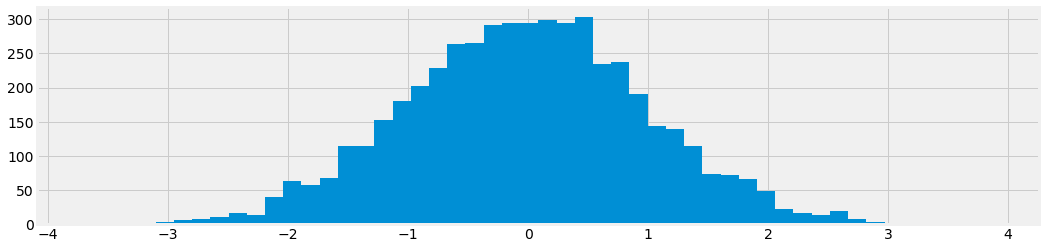

In [61]:
# Convert a NumPy array to Pandas Series and plot a histogram
pd.Series(norm).hist(figsize=(16,4), bins=50);

### Another bins example: Sometimes the binning makes the data look different or misleading.

In [65]:
two_norm = np.concatenate((np.random.standard_normal(2500) - 1.25, np.random.standard_normal(2500) + 1.25))

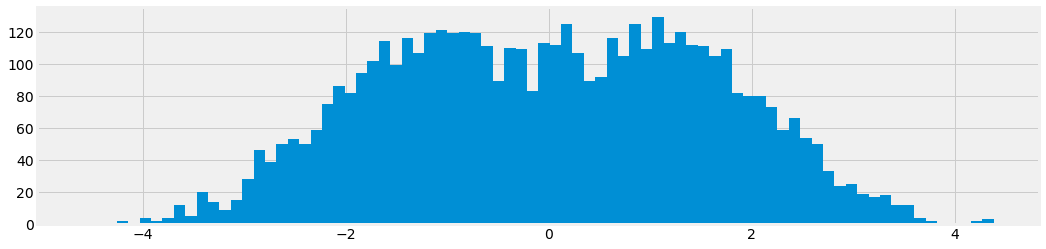

In [66]:
pd.Series(two_norm).hist(figsize=(16,4), bins=80);

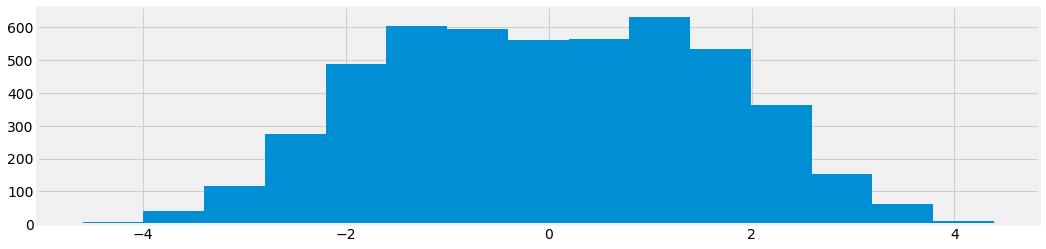

In [67]:
pd.Series(two_norm).hist(figsize=(16,4), bins=15);

### Challenge: Create a histogram with pandas for using `MEDV` in the housing data.
- Set the bins to 20.
- Add a title and axes labels.

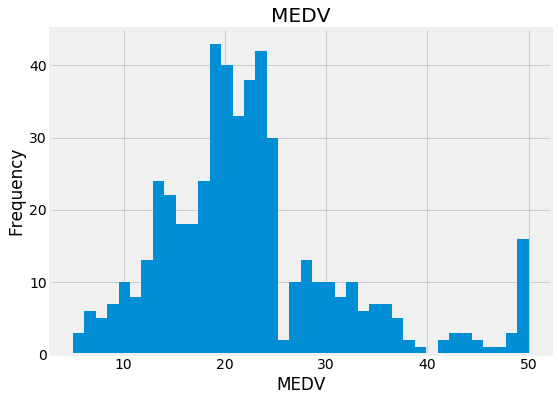

In [91]:
medv_hist = housing.MEDV.plot(kind = 'hist', bins=40)
medv_hist.set_title('MEDV')
medv_hist.set_xlabel('MEDV');

<a id="grouped-histograms"></a>
### Grouped histograms: Show one histogram for each group.

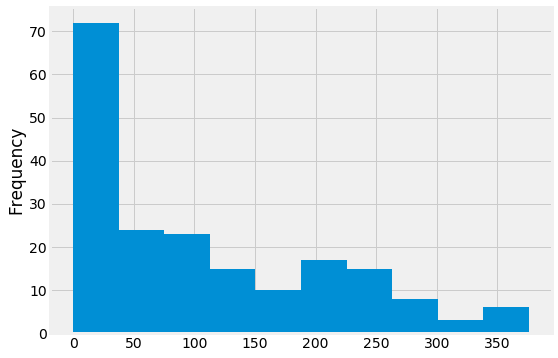

In [95]:
# Reminder: Overall histogram of beer servings
drinks.beer.plot(kind='hist');

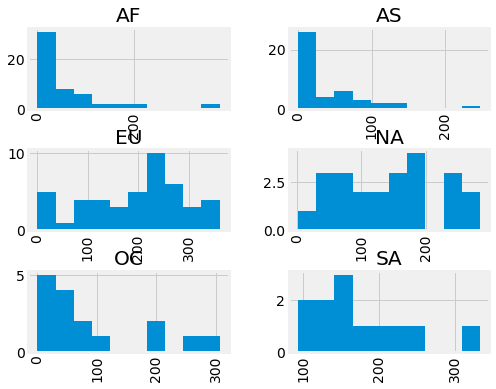

In [93]:
# Histogram of beer servings grouped by continent -- how might these graphs be misleading?
drinks.hist(column='beer', by='continent');

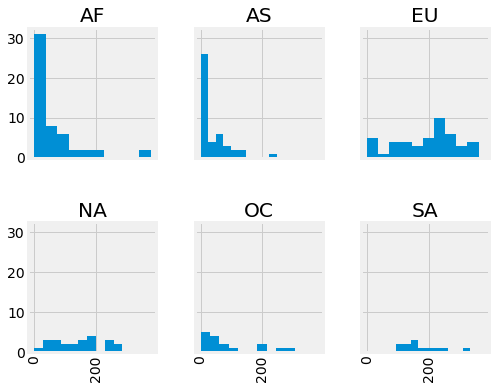

In [94]:
# Share the x- and y-axes.
drinks.hist(column='beer', by='continent', sharex=True, sharey=True, layout=(2, 3));

<a id="box-plots"></a>
## Box Plots: Show quartiles (and outliers) for one or more numerical variables
---

We can use boxplots to quickly summarize distributions.

**Five-number summary:**

- min = minimum value
- 25% = first quartile (Q1) = median of the lower half of the data
- 50% = second quartile (Q2) = median of the data
- 75% = third quartile (Q3) = median of the upper half of the data
- max = maximum value

It's more useful than mean and standard deviation for describing skewed distributions.

**Interquartile Range (IQR)** = Q3 - Q1

**Outliers:**

- points below Q1 - 1.5 * IQR
- point above Q3 + 1.5 * IQR

### Let's see how box plots are generated so we can best interpret them.

In [97]:
# Sort the spirit column.
drinks.spirit.sort_values().values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   2,   2,   2,   2,   2,   2,   2,
         3,   3,   3,   3,   3,   3,   3,   3,   4,   4,   4,   5,   5,
         6,   6,   6,   7,   9,  11,  11,  12,  13,  15,  15,  16,  16,
        18,  18,  18,  18,  19,  21,  21,  22,  22,  25,  25,  27,  29,
        31,  31,  34,  35,  35,  35,  35,  38,  39,  41,  41,  42,  42,
        44,  46,  50,  51,  55,  56,  57,  60,  61,  63,  63,  65,  67,
        68,  69,  69,  69,  71,  71,  72,  74,  75,  76,  76,  79,  81,
        84,  87,  87,  88,  97,  97,  98,  98, 100, 100, 100, 100, 101,
       104, 104, 112, 114, 114, 114, 117, 117, 118, 118, 122, 122, 124,
       126, 128, 131, 132, 133, 133, 135, 137, 138, 145, 147, 151, 152,
       154, 156, 157, 158, 160, 170, 173, 173, 176, 178, 179, 186, 189,
       192, 194, 200, 202, 205, 215, 215, 216, 221, 226, 237, 24

In [98]:
# Show "five-number summary" for spirit.
drinks.spirit.describe()

count    193.000000
mean      80.994819
std       88.284312
min        0.000000
25%        4.000000
50%       56.000000
75%      128.000000
max      438.000000
Name: spirit, dtype: float64

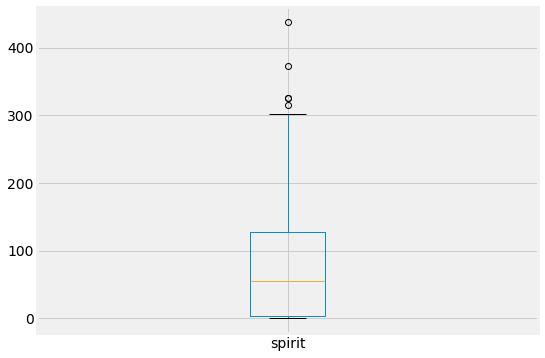

In [99]:
# Visualise using a box plot.
drinks.spirit.plot(kind='box');

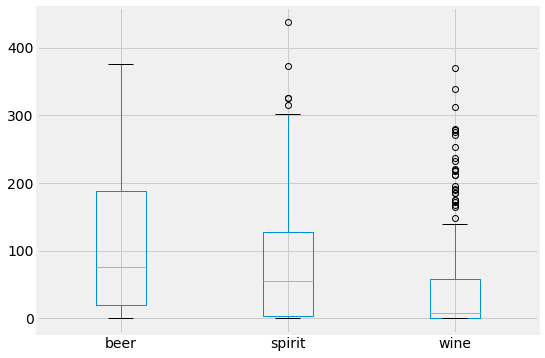

In [100]:
# Compare multiple columns of a DataFrame.
drinks.drop('liters', axis=1).plot(kind='box');

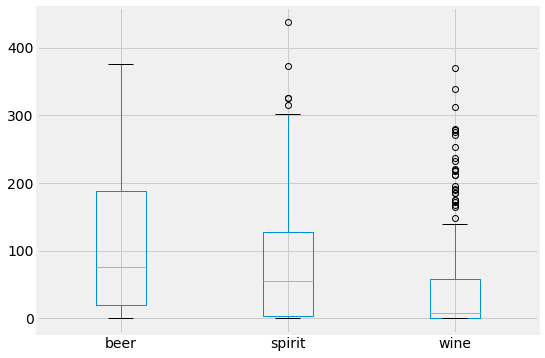

In [104]:
# Alternatively, you can use .boxplot() method:
drinks.drop('liters', axis=1).boxplot(showfliers=True);

### How to use a box plot to show outliers

In [105]:
norm = np.concatenate((np.random.standard_normal(100), [10]))

In [106]:
norm

array([-9.92738755e-01,  2.90795710e-01, -3.50761534e-01,  4.78950753e-01,
        1.08939239e+00,  9.51861686e-01, -1.00545287e-02,  2.46598227e-01,
        4.48734157e-01,  7.92604488e-01,  5.33166857e-01,  4.45439034e-01,
        8.48203918e-01,  8.53440336e-01,  1.35514788e-01,  7.31538179e-01,
        1.86570254e+00,  4.96763663e-01,  1.82828167e+00,  1.04379515e+00,
        2.37530237e-01,  6.14446489e-02,  3.74958130e+00,  1.17078039e+00,
       -8.97693836e-01,  2.59848541e-02, -2.20477351e-01,  4.32075589e-01,
        1.83679599e-01, -1.44580901e-01,  1.76729018e+00,  1.19730564e+00,
       -2.70733834e-01, -1.59140665e+00,  7.77301880e-01,  1.07668533e+00,
        2.89740169e-01,  6.32193944e-01, -7.27538099e-01,  7.61752805e-02,
        3.98764959e-01, -1.04013825e+00,  1.14433491e+00,  5.21297070e-01,
       -3.17059249e-01,  8.68272603e-01,  1.07891371e+00, -2.36710623e-01,
        8.31258972e-01,  5.03482556e-02,  1.71396716e+00,  3.55969991e-01,
       -1.46183850e-01, -

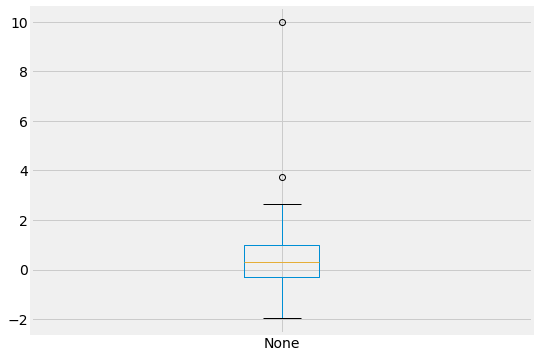

In [107]:
pd.Series(norm).plot(kind='box');

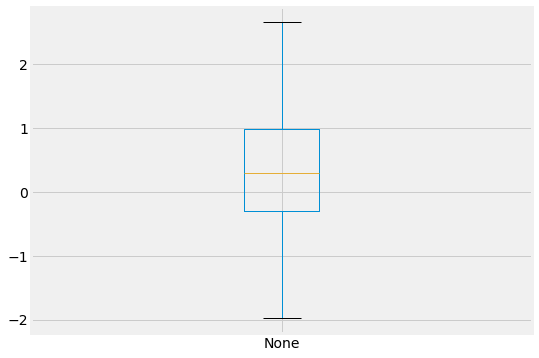

In [108]:
# Set showfliers=False to prevent from plotting outliers. 
# CAUTION: even though the plot looks neater without outliers it doesn't convey the full story!
pd.Series(norm).plot(kind='box', showfliers=False);

### How to use a box plot to preview the distributions in the housing data

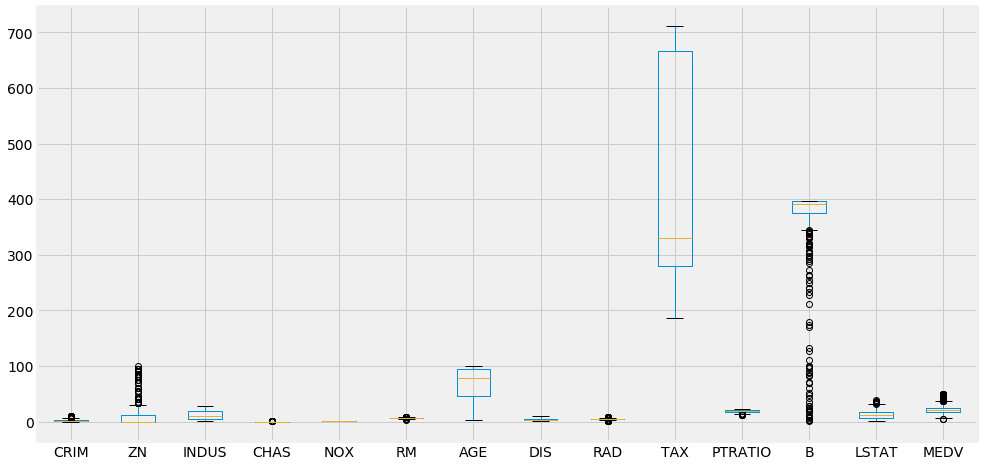

In [109]:
housing.boxplot(figsize=(15,8)); # data can be standadied by subtracting by mean and dividing by the std deviation 
# this allows the data to be more comparabtle between different variables --> feedable to machine learning

<a id="grouped-box-plots"></a>
### Grouped box plots: Show one box plot for each group.

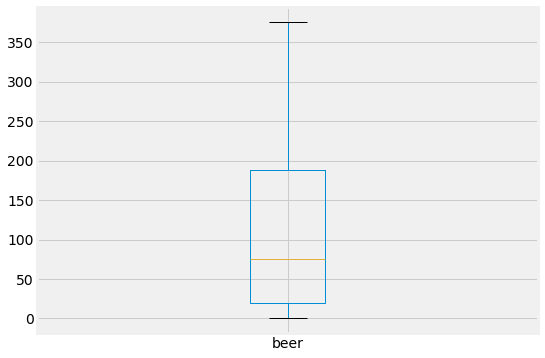

In [112]:
# Reminder: box plot of beer servings
drinks.beer.plot(kind='box');

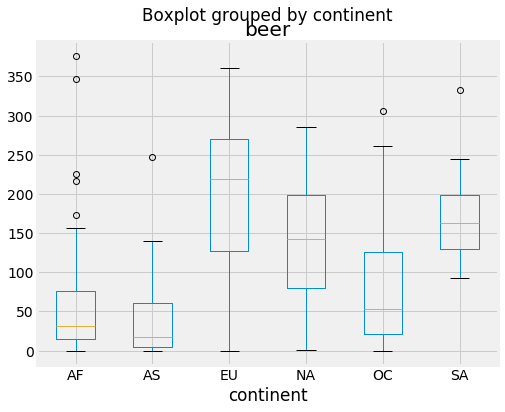

In [113]:
# Box plot of beer servings grouped by continent
drinks.boxplot(column='beer', by='continent');

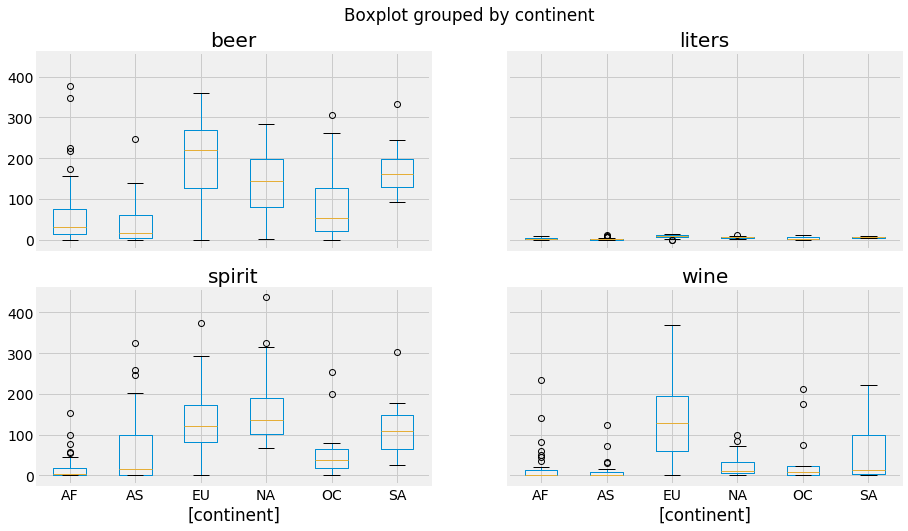

In [114]:
# Box plot of all numeric columns grouped by continent
drinks.boxplot(by='continent', figsize=(15,8));

<a id="scatter-plots"></a>
## Scatter plots: Show the relationship between two numerical variables
---


In [116]:
# Select the beer and wine columns and sort by beer.
#drinks[['beer', 'wine']].sort_values('beer').values

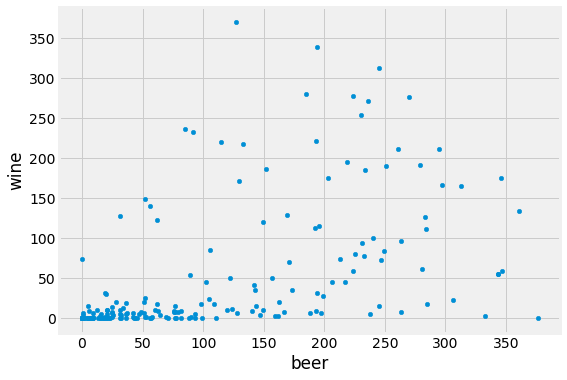

In [117]:
# Compare with scatter plot.
drinks.plot(kind='scatter', x='beer', y='wine');

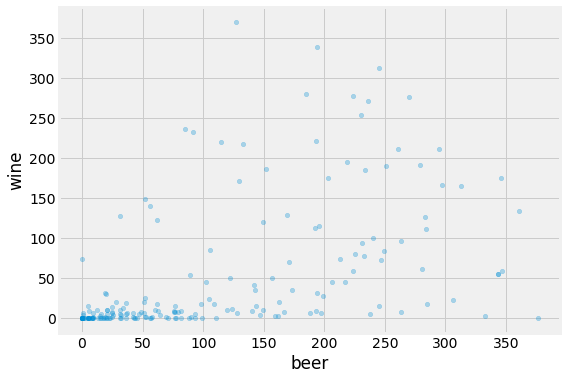

In [118]:
# Add transparency (great for plotting several graphs on top of each other, or for illustrating density!).
drinks.plot(kind='scatter', x='beer', y='wine', alpha=0.3); #denisty = alpha 

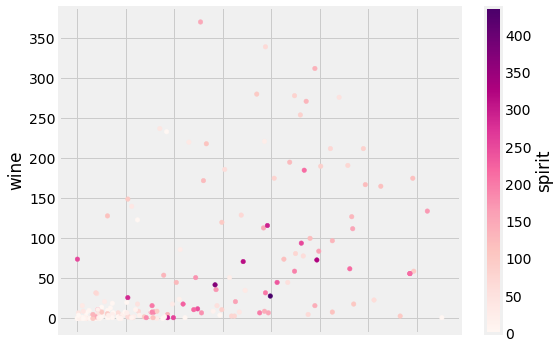

In [119]:
# Vary point color by spirit servings.
drinks.plot(kind='scatter', x='beer', y='wine', c='spirit', colormap='RdPu');

More colour maps [here](https://matplotlib.org/users/colormaps.html), try the one you like!

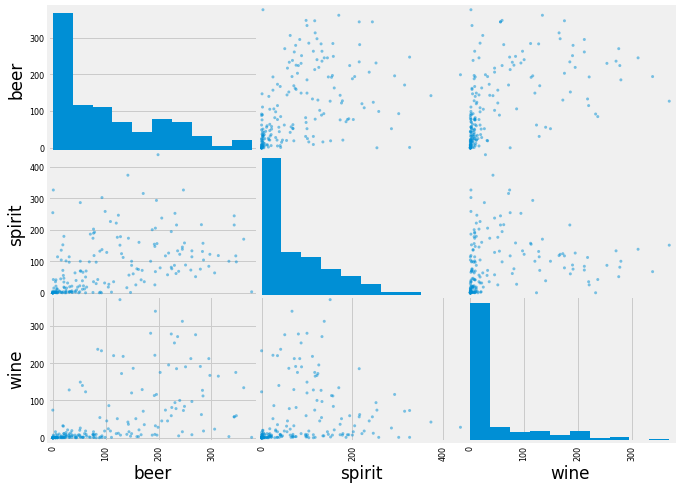

In [120]:
# Scatter matrix of three numerical columns. Note a different syntax!
pd.plotting.scatter_matrix(drinks[['beer', 'spirit', 'wine']], figsize=(10, 8));

### Plotting `DataFrames`

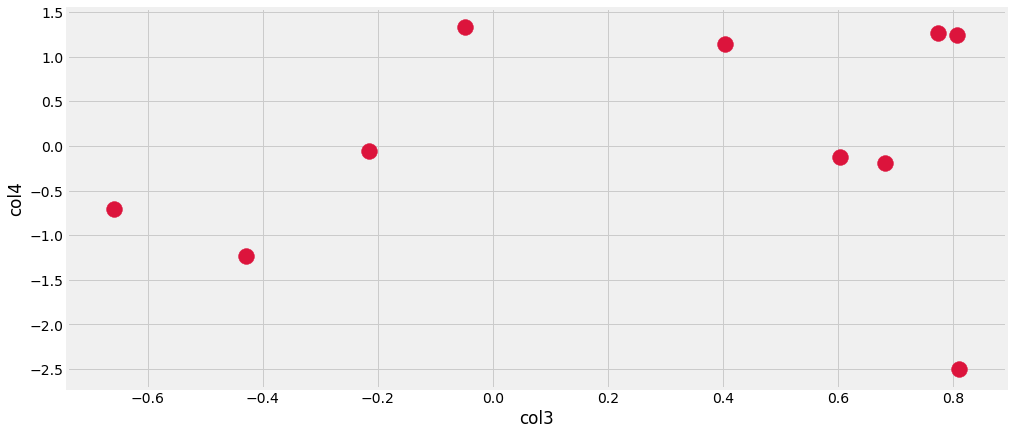

In [121]:
df.plot(x='col3', y='col4', kind='scatter', color='crimson',
        figsize=(15,7), s=250);

### Challenge: create a scatter plot of `ZN` and `INDUS` in the housing data

- Set the point size to 100.
- Can you see the association between the variables?

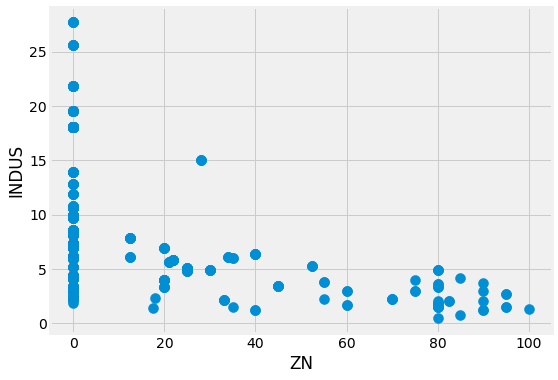

In [130]:
housing.plot(kind = 'scatter', x='ZN', y='INDUS',s=100);

### How to use a list comprehension to change the size of the scatter plot dots based on `DIS`

In [ ]:
housing.DIS

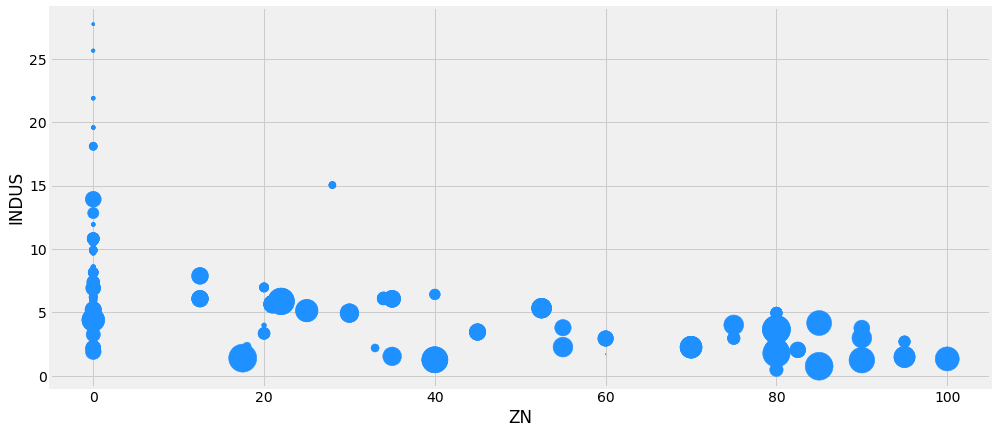

In [131]:
# This list comprehension sets the point sizes ('s') to be the squares of the values in housing['DIS']
housing.plot(x='ZN', y='INDUS', kind='scatter', 
           color='dodgerblue', figsize=(15,7), s=[x**3 for x in housing['DIS']]);

<a id="seaborn"></a>
## Seaborn `pairplot`

---

- **Objective:** Know when to use Seaborn or advanced Matplotlib.

With the `DataFrame` object `housing`, we will render a pairplot using the Seaborn library.
What do each of the elements represent? Is this more or less useful than the previous plot?

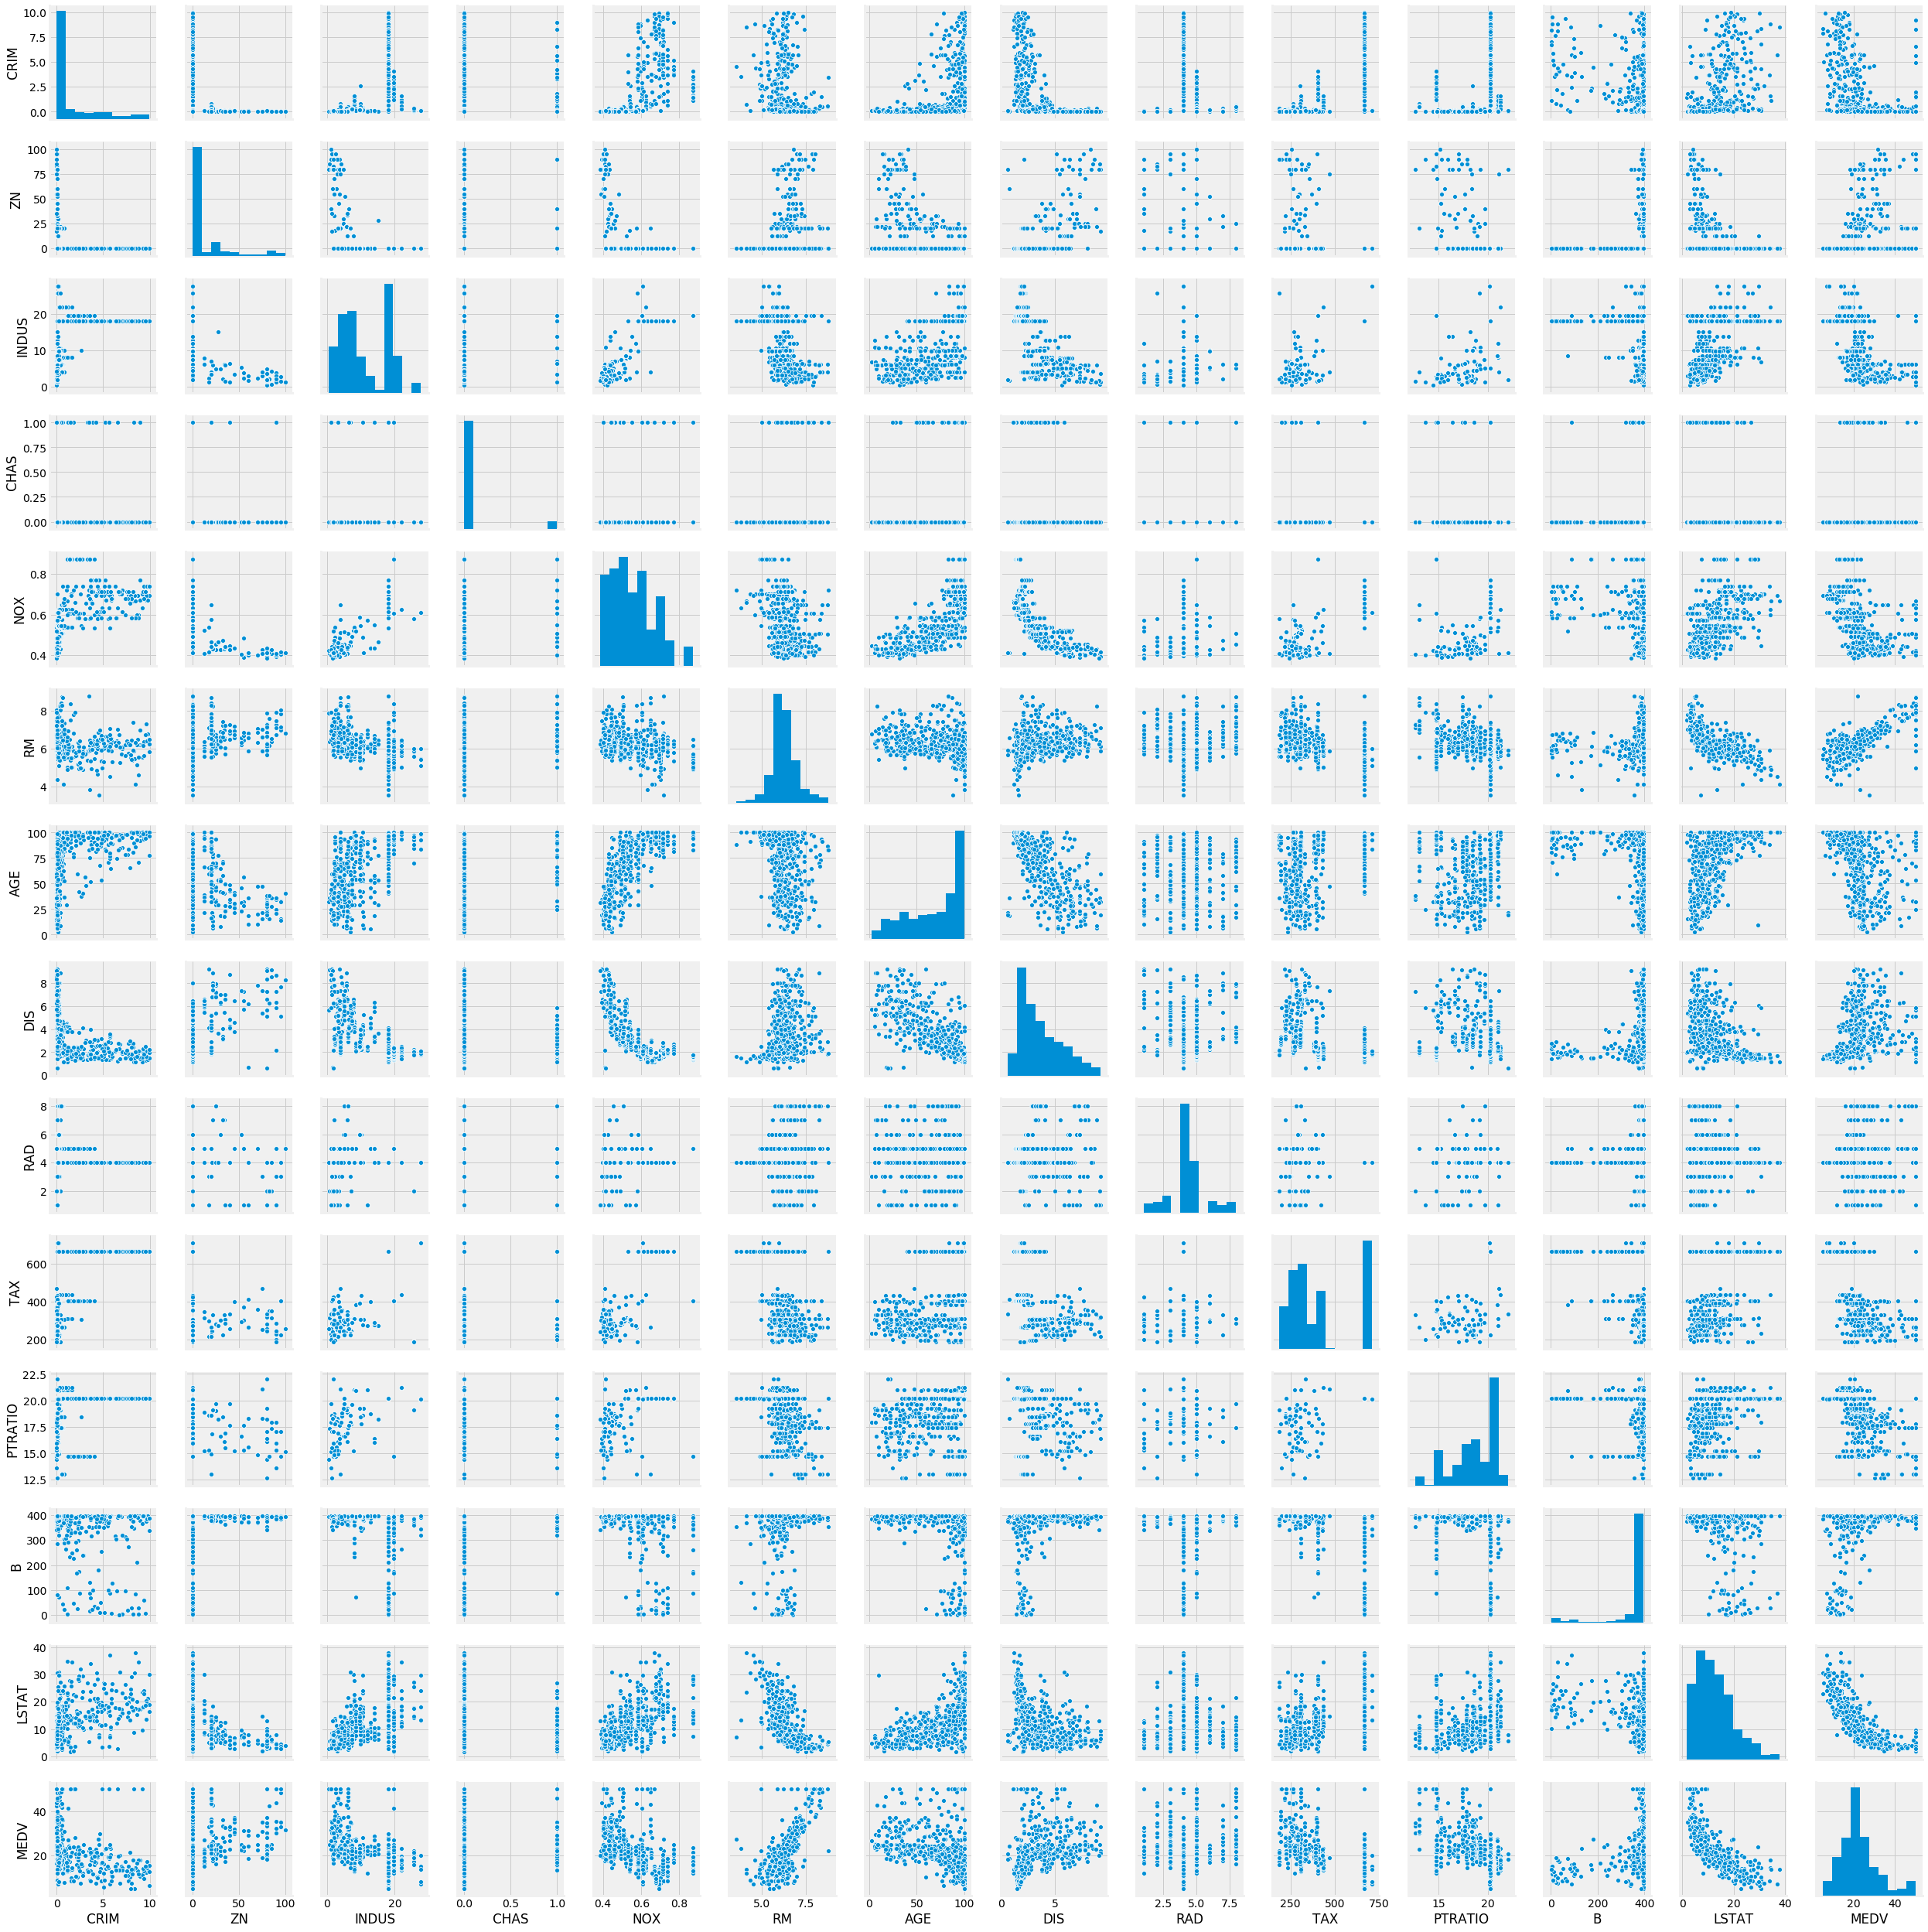

In [132]:
sns.pairplot(housing);

**Answer:** _What do each of the elements represent?  Is this more or less useful than the previous plot?_
> In a pair plot we get to see every relationship between every _pair_ of variables.  We can see this is very useful for quickly discovering which variables have some kind of correlation during an exploratory data analysis.  However, when just looking at the `INDUS` feature, the pair plot is more difficult to read and interpret as opposed to the single histogram.  

## Seaborn `heatmap`
---

When you have too many variables, a pairplot or scatter matrix can become impossible to read. We can still gauge linear correlation using a heatmap of the correlation matrix.

In [1]:
# Make a heatmap on the correlations between variables in the housing data:
housing_correlations = housing.corr();
sns.heatmap(housing_correlations,  cmap=sns.color_palette("RdBu_r", 30), vmax=1 ,vmin = -1);

NameError: name 'housing' is not defined

### Customising your graphs

* There are plenty of ways to customise your graphs. Go to google, type `seaborn heatmap` and click the first link. This will probably take you to the [website](https://seaborn.pydata.org/generated/seaborn.heatmap.html) containing `seaborn` documentation. There you can find a list of all the parameters of the method and their possible values.
* [Python-Graph-Gallery](https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/) contains hundreds of examples of data visualisations with reproducible Python code provided. Find the one you like or mix and match to create your own!

### Challenge: Create a scatter plot of two heatmap entries that appear to have a very positive correlation.

- Now, create a scatter plot of two heatmap entries that appear to have negative correlation.

<a id="matplotlib"></a>
## OPTIONAL: Understanding Matplotlib (Figures, Subplots, and Axes)

---

Matplotlib uses a blank canvas called a figure.

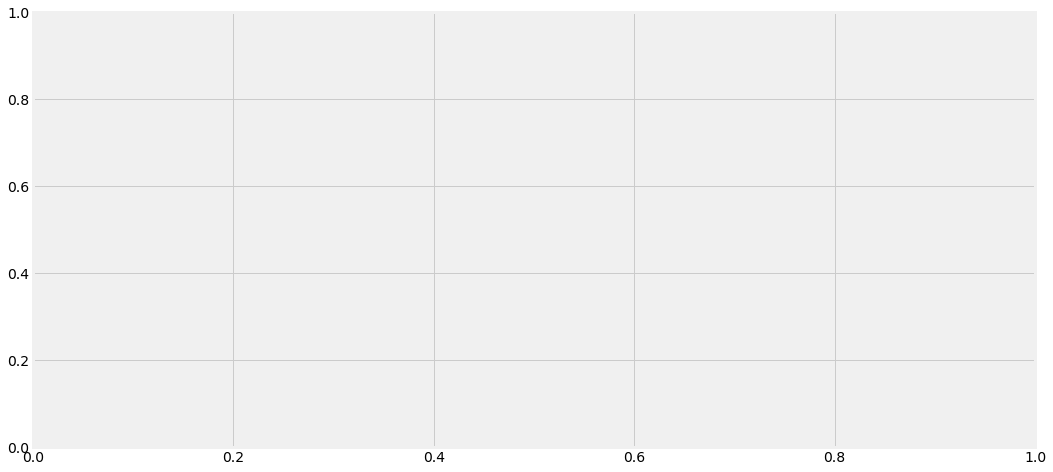

In [140]:
fig = plt.subplots(1,1, figsize=(16,8));

Within this canvas, we can contain smaller objects called axes.

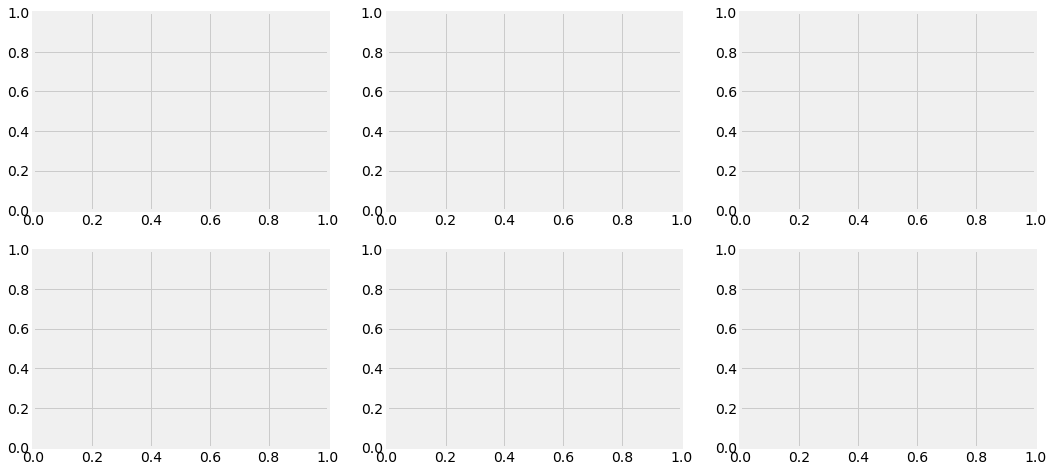

In [141]:
fig, axes = plt.subplots(2,3, figsize=(16,8));

Pandas allows us to plot to a specified axes if we pass the object to the ax parameter.

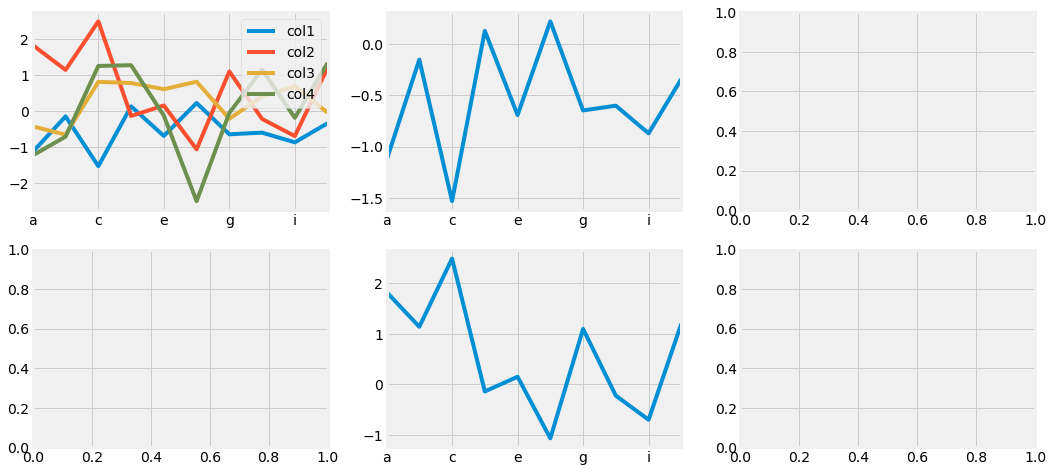

In [142]:
fig, axes = plt.subplots(2,3, figsize=(16,8))
df.plot(ax=axes[0][0]);
df['col1'].plot(ax=axes[0][1]);
df['col2'].plot(ax=axes[1][1]);

## Let's use a bit more customization.
---

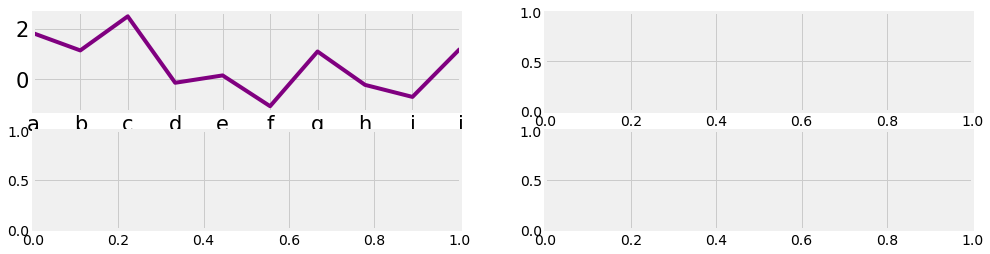

In [143]:
fig, axes = plt.subplots(2,2, figsize=(15,7))

# We can change the ticks' size.
df['col2'].plot(figsize=(15,4), color='purple', fontsize=21, ax=axes[0][0]);

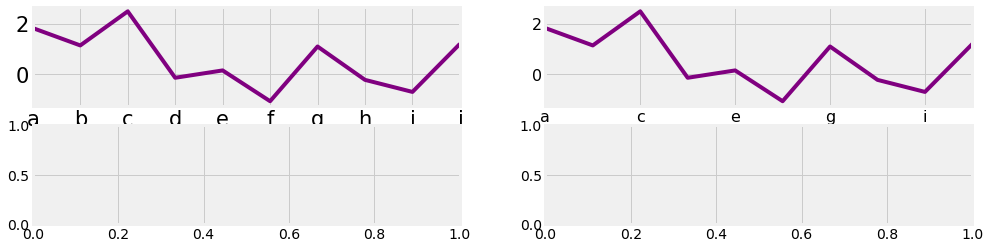

In [144]:
fig, axes = plt.subplots(2,2, figsize=(15,7))

# We can change the ticks' size.
df['col2'].plot(figsize=(15,4), color='purple', fontsize=21, ax=axes[0][0]);

# We can also change which ticks are visible.
# Let's show only the even ticks. ('idx % 2 == 0' only if 'idx' is even.)
ticks_to_show = [idx for idx, _ in enumerate(df['col2'].index) if idx % 2 == 0]
df['col2'].plot(figsize=(15,4), color='purple', xticks=ticks_to_show, fontsize=16, ax=axes[0][1]);

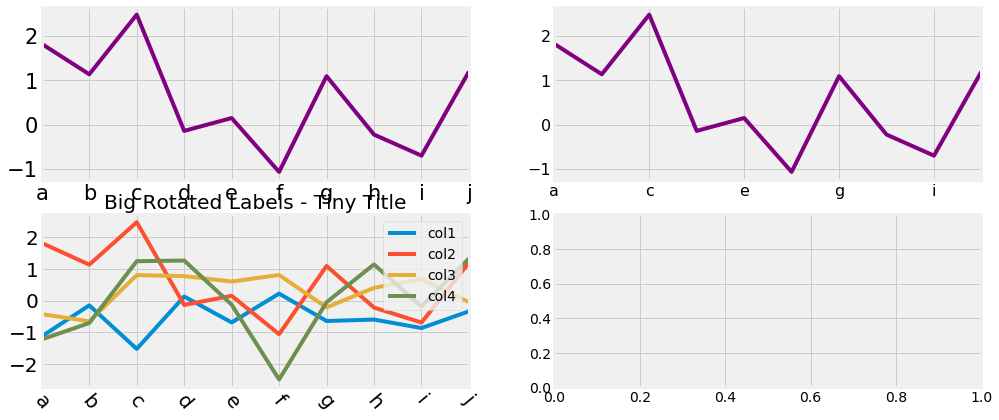

In [145]:
fig, axes = plt.subplots(2,2, figsize=(15,7))

# We can change the ticks' size.
df['col2'].plot(figsize=(15,7), color='purple', fontsize=21, ax=axes[0][0]);

# We can also change which ticks are visible.
# Let's show only the even ticks. ('idx % 2 == 0' only if 'idx' is even.)
ticks_to_show = [idx for idx, _ in enumerate(df['col2'].index) if idx % 2 == 0]
df['col2'].plot(figsize=(15,7), color='purple', xticks=ticks_to_show, fontsize=16, ax=axes[0][1]);

# We can change the label rotation.
df.plot(figsize=(15,7), title='Big Rotated Labels - Tiny Title', fontsize=20, rot=-50, ax=axes[1][0]);

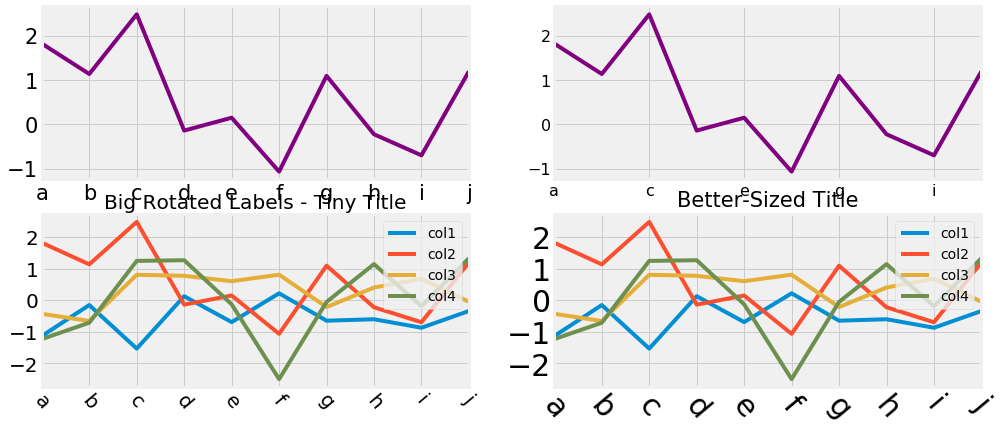

In [146]:
fig, axes = plt.subplots(2,2, figsize=(15,7))

# We can change the ticks' size.
df['col2'].plot(figsize=(15,7), color='purple', fontsize=21, ax=axes[0][0])

# We can also change which ticks are visible.
# Let's show only the even ticks. ('idx % 2 == 0' only if 'idx' is even.)
ticks_to_show = [idx for idx, _ in enumerate(df['col2'].index) if idx % 2 == 0]
df['col2'].plot(figsize=(15,7), color='purple', xticks=ticks_to_show, fontsize=16, ax=axes[0][1])

# We can change the label rotation.
df.plot(figsize=(15,7), title='Big Rotated Labels - Tiny Title',\
        fontsize=20, rot=-50, ax=axes[1][0]);

# We have to use ".set_title()" to fix title size.
df.plot(figsize=(15,7), fontsize=30, rot=-50, ax=axes[1][1])\
       .set_title('Better-Sized Title', fontsize=21, y=1.01);

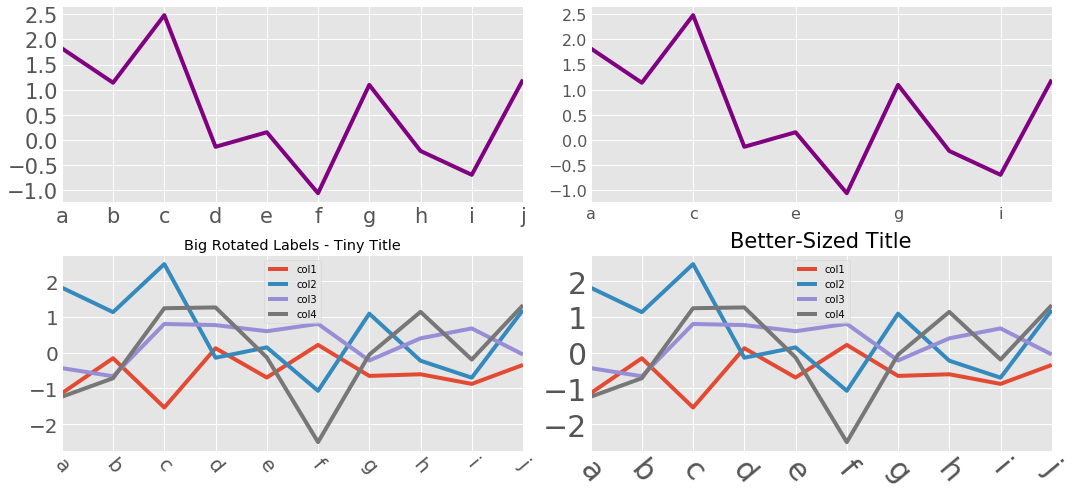

In [152]:
fig, axes = plt.subplots(2,2, figsize=(15,7))

# We can change the ticks' size.
df['col2'].plot(figsize=(15,7), color='purple', fontsize=21, ax=axes[0][0])

# We can also change which ticks are visible.
# Let's show only the even ticks. ('idx % 2 == 0' only if 'idx' is even.)
ticks_to_show = [idx for idx, _ in enumerate(df['col2'].index) if idx % 2 == 0]
df['col2'].plot(figsize=(15,7), color='purple', xticks=ticks_to_show, fontsize=16, ax=axes[0][1])

# We can change the label rotation.
df.plot(figsize=(15,7), title='Big Rotated Labels - Tiny Title',\
        fontsize=20, rot=-50, ax=axes[1][0]);

# We have to use ".set_title()" to fix title size.
df.plot(figsize=(15,7), fontsize=30, rot=-50, ax=axes[1][1])\
       .set_title('Better-Sized Title', fontsize=21, y=1.01);
    
# Finally, we can use ".tight_layout()" to ensure enough padding.
fig.tight_layout()

<a id="additional-topics"></a>
## OPTIONAL: Additional Topics

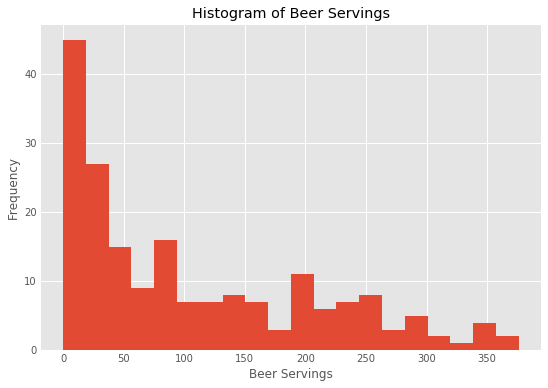

In [151]:
# Saving a plot to a file
drinks.beer.plot(kind='hist', bins=20, title='Histogram of Beer Servings');
plt.xlabel('Beer Servings');
plt.ylabel('Frequency');
plt.savefig('beer_histogram.png');    # Save to file!

In [149]:
# List available plot styles
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [150]:
# Change to a different style.
plt.style.use('ggplot')

<a id="summary"></a>
### Summary

In this lesson, we showed examples how to create a variety of plots using Pandas and Matplotlib. We also showed how to use each plot to effectively display data.

Do not be concerned if you do not remember everything — this will come with practice! Although there are many plot styles, many similarities exist between how each plot is drawn. For example, they have most parameters in common, and the same Matplotlib functions are used to modify the plot area.

We looked at:
- Line plots
- Bar plots
- Histograms
- Box plots
- Special seaborn plots
- How Matplotlib works